In [ ]:
"""
Purpose: To check on the status of the Allen split suggestions pipeline
as they run through

- Downloading
- Decimation
- Soma Finding
- Decomposition
- Suggestion Splits

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

INFO - 2021-01-26 22:13:05,249 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-26 22:13:05,251 - settings - Setting database.user to celiib
INFO - 2021-01-26 22:13:05,252 - settings - Setting database.password to newceliipass
INFO - 2021-01-26 22:13:05,257 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-26 22:13:05,257 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-26 22:13:05,287 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-26 22:13:05,598 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-26 22:13:06,280 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-26 22:13:06,606 - settings - Setting enable_python_native_blobs to True


# All the cells that need to get suggestions

In [5]:
minnie.MultiSomaProofread2()

segment_id segment id for those to be decimated,n_somas the number of somas associated with the neuron from the Allen Institute
864691135012398582,2
864691135012571126,2
864691135065018692,2
864691135065032772,3
864691135210078912,3
864691135341171909,2
864691135345134239,2
864691135345274271,3
864691135345280671,3
864691135345291423,2


# Checking on Meshes

In [6]:
minnie.Mesh() & minnie.MultiSomaProofread2()

segment_id segment id unique within each Segmentation,n_vertices number of vertices,n_faces number of faces,mesh in-place path to the hdf5 mesh file
864691135012398582,5609022,11193873,=BLOB=
864691135012571126,5684173,11348165,=BLOB=
864691135065018692,3805643,7594973,=BLOB=
864691135065032772,5239892,10451383,=BLOB=
864691135210078912,9189315,18350897,=BLOB=
864691135341171909,3282661,6559194,=BLOB=
864691135345134239,5232450,10445179,=BLOB=
864691135345274271,9304682,18571186,=BLOB=
864691135345280671,10645387,21261638,=BLOB=
864691135345291423,2872967,5734478,=BLOB=


# Checking on Decimation

In [7]:
minnie.Decimation() & minnie.MultiSomaProofread2()

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691135012398582,0,0.25,1376990,2794781,=BLOB=
864691135012571126,0,0.25,1405952,2834699,=BLOB=
864691135065018692,0,0.25,927599,1896021,=BLOB=
864691135065032772,0,0.25,1284918,2610256,=BLOB=
864691135210078912,0,0.25,2254579,4581171,=BLOB=
864691135341171909,0,0.25,822316,1638121,=BLOB=
864691135345134239,0,0.25,1300713,2608916,=BLOB=
864691135345274271,0,0.25,2309163,4637079,=BLOB=
864691135345280671,0,0.25,2631717,5309289,=BLOB=
864691135345291423,0,0.25,708043,1432111,=BLOB=


# Checking on Soma

In [38]:
len(minnie.MultiSomaProofread2() & minnie.BaylorSegmentCentroid.proj())

67

In [41]:
import datajoint as dj
dj.config["display.limit"]=100
minnie.MultiSomaProofread2() & (minnie.BaylorSegmentCentroid() & "multiplicity=0")

INFO - 2021-01-27 02:43:47,669 - settings - Setting display.limit to 100


segment_id segment id for those to be decimated,n_somas the number of somas associated with the neuron from the Allen Institute
864691136236789519,3
864691136922748900,2


In [46]:
du = reload(du)

du.plot_decimated_mesh_with_somas(864691136922748900)

INFO - 2021-01-27 02:51:20,864 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-27 02:51:20,865 - settings - Setting database.user to celiib
INFO - 2021-01-27 02:51:20,865 - settings - Setting database.password to newceliipass
INFO - 2021-01-27 02:51:20,870 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 02:51:21,237 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 02:51:21,341 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-27 02:51:21,342 - settings - Setting database.user to celiib
INFO - 2021-01-27 02:51:21,343 - settings - Setting database.password to newceliipass
INFO - 2021-01-27 02:51:21,344 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 02:51:21,669 - settings - Setting enable_python_native_blobs to True


Segment_id = 864691136922748900
vertices = 1335118, faces= = 2688424
No nuclei to plot
subtracting glia and nuclei
curr_colors = []
curr_soma_meshes_filtered = []
other_meshes_to_plot = []


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [51]:
len(minnie.SpineRecalculation())

55903

# checking on Decomposition

In [160]:
schema.jobs & "table_name = '__decomposition'" & "timestamp>'2021-01-26 01:00:00'" & "status='reserved'"

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition,223292d754d01c10ec97cae17b086998,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,82983,2021-01-27 09:47:39
__decomposition,2fce6f814c2680709bb844fc65ac2a5b,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.170,at-node43,19,82986,2021-01-27 09:57:48
__decomposition,506d3d601e1943a767f8e2cdda3d7d58,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.152,at-node25,19,82998,2021-01-27 09:56:48
__decomposition,aa709d1a693e4a34112e3ab4e8e44be5,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,82982,2021-01-27 09:45:41
__decomposition,b0b22dd34002f2b5689041840713cc73,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,82977,2021-01-27 09:56:48
__decomposition,bd29d3a6db5048a08e22e2e14aab303c,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.138,at-node11,19,82985,2021-01-27 09:54:13
__decomposition,cf8a75c82baa4f6aa0d0ee3300b9d343,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,82981,2021-01-27 09:55:54
__decomposition,d426b172fbcc561d47e5b2edd6f90404,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.130,at-node3,19,82990,2021-01-27 09:46:53
__decomposition,ecade58def7f429c635e3344b4b9ff0a,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,82978,2021-01-27 09:54:44


In [195]:
len(minnie.MultiSomaProofread2.proj() & minnie.Decomposition().proj())

57

In [179]:
len(minnie.Decomposition() & minnie.MultiSomaProofread2.proj())

56

In [95]:
(minnie.MultiSomaProofread2() & minnie.Decomposition.proj())

segment_id segment id for those to be decimated,n_somas the number of somas associated with the neuron from the Allen Institute
864691135065018692,2
864691135065032772,3
864691135341171909,2
864691135345291423,2
864691135403709422,2
864691135403794158,3
864691135428492848,3
864691135526113627,3
864691135577031173,3
864691135699307810,3


In [93]:
len(minnie.SpineRecalculation())

64516

In [73]:
len(minnie.Decomposition())

63639

# checking on the Splitting

In [177]:
schema.external['decomposition'].delete(delete_external_files=True)

100%|██████████| 37/37 [00:00<00:00, 70.75it/s]


[]

In [170]:
print((schema.jobs & "key_hash='c176cf26668c29a5fb5042df99d5f7cc'").fetch1("error_stack"))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/datajoint/autopopulate.py", line 159, in populate
    make(dict(key))
  File "Allen_6_DecompositionSplit.py", line 227, in make
    split_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
  File "/meshAfterParty/proofreading_utils.py", line 770, in multi_soma_split_suggestions
    **kwargs)
  File "/meshAfterParty/proofreading_utils.py", line 110, in get_best_cut_edge
    verbose=verbose)
  File "/meshAfterParty/proofreading_utils.py", line 1942, in remove_branches_from_limb
    run_concept_network_checks=False,
  File "/meshAfterParty/preprocessing_vp2.py", line 706, in calculate_limb_concept_networks
    current_coordinate=endpt)[0]
IndexError: list index out of range



In [196]:
(schema.jobs & "table_name = '__decomposition_split'")#.delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition_split,003215339e169f43922a8413f25236d7,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.147,at-node20,19,83540,2021-01-27 13:22:18
__decomposition_split,26705c892e1ccb1d2c668560a234d916,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.140,at-node13,19,83546,2021-01-27 13:50:56
__decomposition_split,4e5ad5583bdd323e3ffecf21aabe26ac,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,83528,2021-01-27 13:44:40
__decomposition_split,7f63389e821789494f26b515ea0626ad,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.150,at-node23,19,83541,2021-01-27 13:31:59
__decomposition_split,b320e7f0e2dc68919e6b531d7fea02b2,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.136,at-node9,19,83533,2021-01-27 13:52:54
__decomposition_split,b98a2d4c077b08030dd3eaf883102f2e,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.160,at-node33,19,83538,2021-01-27 13:52:43
__decomposition_split,c176cf26668c29a5fb5042df99d5f7cc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.28.0.140,at-node13,19,83546,2021-01-27 13:32:16
__decomposition_split,f2d75465c44bac96d7e8fb290d3e1e84,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,83530,2021-01-27 13:46:48
__decomposition_split,fede8003b34752cbdb3674d4bba6402b,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.161,at-node34,19,83545,2021-01-27 13:53:05


In [225]:
len( minnie.MultiSomaProofread2.proj() & minnie.DecompositionSplit())

52

In [224]:
du.create_suggested_splits_neuroglancer_spreadsheet(table_to_restrict= minnie.MultiSomaProofread2.proj(),
                                                   output_filename="allen_spreadsheet_1_27.csv",
                                                   output_type="server")

segment_id = 864691135012398582
segment_id = 864691135012571126
segment_id = 864691135065018692
segment_id = 864691135065032772
segment_id = 864691135341171909
segment_id = 864691135345134239
segment_id = 864691135345274271
segment_id = 864691135373436616
segment_id = 864691135403709422
segment_id = 864691135403794158
segment_id = 864691135428492848
segment_id = 864691135440585800
segment_id = 864691135490263655
segment_id = 864691135526113627
segment_id = 864691135526114907
segment_id = 864691135568932230
segment_id = 864691135577031173
segment_id = 864691135593563947
segment_id = 864691135593565995
segment_id = 864691135609477127
segment_id = 864691135615814761
segment_id = 864691135654121154
segment_id = 864691135686909664
segment_id = 864691135699307810
segment_id = 864691135718447153
segment_id = 864691135724299179
segment_id = 864691135740250731
segment_id = 864691135771720779
segment_id = 864691135780852304
segment_id = 864691135815508815
segment_id = 864691135837279635
segment_

In [209]:
segment_id = 864691135012571126

In [210]:
du.plot_decimated_mesh_with_somas(segment_id)

Segment_id = 864691135012571126
vertices = 1405952, faces= = 2834699
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes_filtered = [<trimesh.Trimesh(vertices.shape=(37841, 3), faces.shape=(74765, 3))>]
other_meshes_to_plot = []


In [226]:
neuron_obj = (minnie.Decomposition & dict(segment_id=864691135526114907)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [ ]:
neuron_obj

In [217]:
from annotationframeworkclient import FrameworkClient
from nglui import statebuilder

In [221]:
import nglui

In [222]:
nglui.__version__

'2.2.1'

In [218]:
client = pru.get_client()
client.state.build_neuroglancer_url(123, ngl_url='blah')

'blah/?json_url=https://globalv1.daf-apis.com/nglstate/api/v1/123'

In [223]:
pru.split_info_to_neuroglancer_link(segment_id,
                               split_info=limb_results,
                                   output_type="server")

segment_id = 864691135012571126


'https://akhilesh-graphene-sharded-dot-neuromancer-seung-import.appspot.com/?json_url=https://globalv1.daf-apis.com/nglstate/api/v1/5413348652875776'

In [207]:
limb_results = (minnie.DecompositionSplit() & dict(segment_id=segment_id,split_index=0) ).fetch1("split_results")

In [208]:
limb_results

{0: [{'starting_node_1': 14,
   'starting_node_2': 97,
   'title': 'S2_0 from S1_0 ',
   'edges_to_delete': [array([28, 39]), array([28, 41])],
   'edges_to_create': [[39, 41]],
   'removed_branches': [],
   'coordinate_suggestions': [array([671962., 410041., 679138.]),
    array([671962., 410041., 679138.])],
   'successful_disconnection': True,
   'paths_not_cut': [],
   'paths_cut': [array([[663061.54042553, 427063.84468085, 676602.85319149],
           [663299.8927878 , 426388.14352669, 678121.00261671],
           [666488.60717467, 424146.34801001, 677691.84753525],
           [668973.        , 421888.        , 677711.        ],
           [669798.        , 412769.        , 681944.        ],
           [670860.        , 420363.        , 675778.        ],
           [671614.        , 413306.        , 676440.        ],
           [671663.11004201, 410293.90244224, 679461.24891657],
           [671838.68522126, 410312.89368604, 678838.13435846],
           [671855.        , 415098.  

In [125]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=864691135403709422)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [127]:
neuron_obj.multi_soma_touching_limbs

array([0])

In [128]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(L0="all"))


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [135]:
curr_path = [0, 2, 8, 7, 11, 10]
nviz.plot_branches_with_spines(neuron_obj[0][curr_path[2]])

No spines to plot
width = {'median_mesh_center': 458.0563726098372, 'no_spine_median_mesh_center': 458.0563726098372}, 
n_spines = 0, spine_density = 0.0
 spine_volume_density = 0
skeleton_length = 1946.83146352227


In [124]:
neuron_obj.multi

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)


In [137]:
curr_limb = neuron_obj[0]

[autoreload of proofreading_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/proofreading_utils.py", line 151
    mean_width = np.mean([c

In [141]:
np.argsort(np.array([5,4,3,2,1]))

array([4, 3, 2, 1, 0])

In [129]:
import proofreading_utils as pru

In [147]:
nviz.plot_limb_path(neuron_obj[0],[0, 2, 8, 7,])# 11, 10])

multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[ 0 10]]


---- working on disconnecting 0 and 10
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [0, 2, 8, 7, 11, 10]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 1  2  5  7  8  9 11 12 13]
Short segments to combine = [ 8 13]


-------- Removing Segments -------------
curr_short_seg_revised = 8
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[842231.25 797537.   902547.  ]
 [842956.   799143.   902193.  ]]
new_stitch_point = [842593.625 798340.    902370.   ]
Angles for [2 5 7 9] are [54.47, 15.39, 32.03, 33.51]
Branch that will absorb mesh of 8 is 5 
curr_short_seg_revised = 13
np

Angle between 2 and 5 = 113.04 
Angle between 2 and 7 = 63.42 
Angle between 2 and 9 = 14.87 
Angle between 5 and 7 = 14.15 
Angle between 5 and 9 = 57.01 
Angle between 7 and 9 = 123.09 
Final Matches = [[2, 9], [5, 7]]
matched_branches_revised = [[5, 7], [2, 9]]
Aligned Skeleton Parts


Original graph


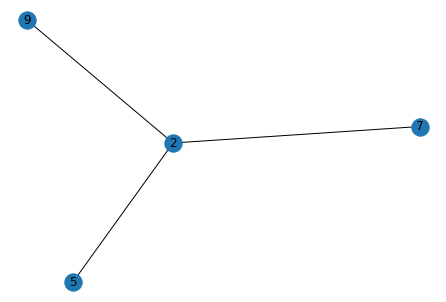

match_branches = [[5, 7], [2, 9]]
edges_to_delete (resolve crossover) = [[2, 5], [2, 7], [5, 9], [7, 9]]
edges_to_create (resolve crossover) = [[5, 7], [2, 9]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(0, 2), (7, 11), (11, 10)]
G.nodes() = [0, 2, 7, 11, 10]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 5], [2, 7], [5, 9], [7, 9]]
edges_to_create = [[5, 7], [2, 9]]
Number of connected components = 4
Comp 0 = {3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 1 = {0, 9, 2, 1}
Comp 2 = {8}
Comp 3 = {13}
curr_limb_copy.deleted_edges = [[2, 5], [2, 7], [5, 9], [7, 9]]
curr_limb_copy.created_edges = [[5, 7], [2, 9]]
After get best cut: cut_

{0: [{'starting_node_1': 0,
   'starting_node_2': 10,
   'title': 'S1_0 from S0_0 ',
   'edges_to_delete': [[2, 5], [2, 7], [5, 9], [7, 9]],
   'edges_to_create': [[5, 7], [2, 9]],
   'removed_branches': [8, 13],
   'coordinate_suggestions': [array([842593.625, 798340.   , 902370.   ]),
    array([842593.625, 798340.   , 902370.   ]),
    array([842593.625, 798340.   , 902370.   ]),
    array([842593.625, 798340.   , 902370.   ])],
   'successful_disconnection': True,
   'paths_not_cut': [],
   'paths_cut': [array([[772941.        , 717899.        , 937089.        ],
           [775252.3183198 , 718910.54554653, 934105.85824125],
           [777981.0193857 , 720061.46115067, 931454.07769865],
           [780823.03759424, 720811.54129593, 928798.37777627],
           [783198.        , 720764.        , 926529.        ],
           [785350.91334867, 723434.49457292, 924626.92420283],
           [786513.78025055, 726107.32142403, 921940.53613702],
           [787760.50913942, 728912.838060

In [149]:
pru.multi_soma_split_suggestions(neuron_obj,
                                plot_suggestions=True,
                                 plot_intermediates=True,
                                remove_segment_threshold=2000)